# Ładujemy wszystkie potrzebne paczki

In [19]:
import pandas as pd 
import numpy as np
import os
from datetime import datetime
import openpyxl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from scipy.stats import pearsonr

# Zmieniamy working directory i ładujemy wszystkie zebrane wcześniej dane

In [20]:
os.chdir('/Users/jmroczek/Documents/moje/studia/PAD/projekt PAD')

In [21]:
injuries = pd.read_csv('injuries.csv', sep = ',')
players = pd.read_csv("playersinfo.csv", delimiter=",")
salaries = pd.read_csv('salaries.csv', sep=';')
stats = pd.read_csv('stats.csv', sep=',')
stats_playoffs = pd.read_csv('stats_playoffs.csv', sep=',')

# Czyszczenie zbioru injuries

In [22]:
injuries

,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
0,0,2003-10-01,Sonics,NaN,Nick Collison,partially dislocated left shoulder
1,1,2003-10-03,Pacers,NaN,Jonathan Bender,arthroscopic surgery on left knee (out 4 weeks)
2,2,2003-10-04,Heat,NaN,Caron Butler,arthroscopic surgery on left knee to remove lo...
3,3,2003-10-04,Suns,NaN,Scott Williams,surgery on left thumb to repair ligaments (out...
4,4,2003-10-05,Rockets,NaN,Maurice Taylor,dislocated left shoulder (out indefinitely)
...,...,...,...,...,...,...
53834,53834,2024-02-08,Pistons,Cade Cunningham,NaN,returned to lineup
53835,53835,2024-02-08,Suns,NaN,Devin Booker,sore left hip (DTD)
53836,53836,2024-02-08,Timberwolves,NaN,Jordan McLaughlin,right hip pointer (DTD)
53837,53837,2024-02-08,Warriors,NaN,Klay Thompson,illness (DTD)


In [23]:
players

,Unnamed: 0,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,0,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11T00:00:00,California,...,shareef_abdur-rahim,1996,2007,N,Y,Y,1996,1,3,N
1,1,203518,Alex,Abrines,Alex Abrines,"Abrines, Alex",A. Abrines,alex-abrines,1993-08-01T00:00:00,FC Barcelona,...,alex_abrines,2016,2018,N,Y,Y,2013,2,32,N
2,2,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,...,precious_achiuwa,2020,2023,N,Y,Y,2020,1,20,N
3,3,101165,Alex,Acker,Alex Acker,"Acker, Alex",A. Acker,alex-acker,1983-01-21T00:00:00,Pepperdine,...,alex_acker,2005,2008,Y,Y,Y,2005,2,60,N
4,4,203112,Quincy,Acy,Quincy Acy,"Acy, Quincy",Q. Acy,quincy-acy,1990-10-06T00:00:00,Baylor,...,quincy_acy,2012,2018,Y,Y,Y,2012,2,37,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,2137,2583,Derrick,Zimmerman,Derrick Zimmerman,"Zimmerman, Derrick",D. Zimmerman,derrick-zimmerman,1981-12-02T00:00:00,Mississippi State,...,derrick_zimmerman,2005,2005,Y,Y,Y,2003,2,40,N
2138,2138,1627757,Stephen,Zimmerman,Stephen Zimmerman,"Zimmerman, Stephen",S. Zimmerman,stephen-zimmerman,1996-09-09T00:00:00,UNLV,...,stephen_zimmerman,2016,2016,Y,Y,Y,2016,2,41,N
2139,2139,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18T00:00:00,Bayern Munich,...,paul_zipser,2016,2017,Y,Y,Y,2016,2,48,N
2140,2140,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04T00:00:00,Darussafaka,...,ante_zizic,2017,2019,Y,Y,Y,2016,1,23,N


In [24]:
injuries.head()

,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
0,0,2003-10-01,Sonics,NaN,Nick Collison,partially dislocated left shoulder
1,1,2003-10-03,Pacers,NaN,Jonathan Bender,arthroscopic surgery on left knee (out 4 weeks)
2,2,2003-10-04,Heat,NaN,Caron Butler,arthroscopic surgery on left knee to remove lo...
3,3,2003-10-04,Suns,NaN,Scott Williams,surgery on left thumb to repair ligaments (out...
4,4,2003-10-05,Rockets,NaN,Maurice Taylor,dislocated left shoulder (out indefinitely)


In [25]:
#Usunięcie kolumny Unnamed:0, Team oraz Acquired - kolumna Acquired jest wypełniona tylko w przypadku, gdy zawodnik wraca z kontuzji
injuries = injuries.drop(columns=['Unnamed: 0', 'Team', 'Acquired'])

In [26]:
#Usunięćie wierszy, w których Relinquished jest nullem. Są to wiersze, które mówią o powrocie z kontuzji zawodnika.
injuries = injuries[~injuries['Relinquished'].isna()]

In [27]:
#Zamiana nazwy kolumny Relinquished na Name
injuries = injuries.rename(columns={'Relinquished': 'Name'})

In [28]:
#Stworzenie kolumny SEASON_ID
injuries['Date'] = pd.to_datetime(injuries['Date']) 

injuries['SEASON_ID'] = injuries['Date'].apply(lambda x: f"{x.year}-{str(x.year + 1)[-2:]}" if x.month >= 10 else f"{x.year - 1}-{str(x.year)[-2:]}")

Analiza słownikowa kontuzji: https://github.com/elap733/NBA-Injuries-Analysis.git

In [29]:
def notes_filter(note):
    """
    This function filters the "notes" field associated with each missed game
    or inactive list event. It returns: (a)  "note keyword" (e.g. calf, shin),
    and (b) a note "category" (eg. lower leg sick, healthy inactive)
    """
    # Convert string to lower case characters
    lower_case_note = note.lower()
    
    #-------------Player activated or returned to lineup----------------------
    if any(x in lower_case_note for x in ['return', 'returned', 'activate', 'activated']):
        return 'returned to lineup', 'n/a'
               
    #----------Healthy Inactive/Missed Game--------------------------
    # If no reason is given for missed game or move to inactive list, assume it
    # was a non-injury move.
    elif lower_case_note in ['placed on il', 'placed on il (p)']:
        return 'roster move', 'healthy inactive'
    
    elif 'suspension' in lower_case_note:
        return 'suspension', 'healthy inactive'
    
    elif any(x in lower_case_note for x in ['family', 'personal', 'birth', 'death']):
        return 'personal reasons', 'healthy inactive'
    
    #-------Rest Inactive--------------------------------
    elif 'rest' in lower_case_note:
        return 'rest', 'rest'
           
    #-------Sick Inactive  -------------------------------
    elif any(x in lower_case_note for x in ['virus', 'headache', 'flu', 'sick', 'illness', 'infection', 'pneumonia', 'gastro', 'appende', 'nausea', 'pox', 'dizziness', 'poisoning', 'bronchitis']):
        return 'sick', 'sick'
    
    #--------Foot Injuries------------------------------------
    elif 'foot' in lower_case_note:
        return 'foot', 'foot'
    elif 'toe' in lower_case_note:
        return 'toe', 'foot'
    elif 'heel' in lower_case_note:
        return 'heel', 'foot'
    
    #-------ankle injuries---------------------------
    elif 'ankle' in lower_case_note:
        return 'ankle', 'ankle'       
    
    #-------Lower leg injuries---------------------------      
    elif 'achilles' in lower_case_note:
        return 'achilles', 'lower leg'  
    elif 'calf' in lower_case_note:
        return 'calf', 'lower leg'
    elif 'shin' in lower_case_note:
        return 'shin', 'lower leg'
    elif 'tibia' in lower_case_note:
        return 'tibia', 'lower leg'
    elif 'fibula' in lower_case_note:
        return 'fibula', 'lower leg'
   
    #---------Knee injuries------------------------------------
    elif 'acl' in lower_case_note:
        return 'ACL', 'knee'
    elif 'mcl' in lower_case_note:
        return 'MCL', 'knee'
    elif any(x in lower_case_note for x in ['knee', 'patella', 'meniscus']):
        return 'knee', 'knee'
    
    #---------Upper leg injuries---------------------------------
    elif any(x in lower_case_note for x in ['quad', 'quadriceps', 'thigh']):
        return 'quad', 'upper leg'
    elif 'pelvis' in lower_case_note:
        return 'pelvis', 'upper leg'
    elif 'tailbone' in lower_case_note:
        return 'tailbone', 'upper leg'
    elif 'hamstring' in lower_case_note:
        return 'hamstring', 'upper leg'
    elif 'groin' in lower_case_note:
        return 'groin', 'upper leg'
    elif any(x in lower_case_note for x in ['hip', 'adductor']):
        return 'hip', 'upper leg'
    elif 'femur' in lower_case_note:
        return 'femur', 'upper leg'
    
    #-----------leg catch all------------------------------------
    elif 'leg' in lower_case_note:
        return 'leg', 'leg'
    
    #-----------shoulder injuries--------------------------   
    elif any(x in lower_case_note for x in ['shoulder', 'rotator cuff']):
        return 'shoulder', 'shoulder'
    
    #-----------Torso injuries--------------------------
    elif any(x in lower_case_note for x in ['chest', 'pectoral']):
        return 'chest', 'torso'
    elif 'back' in lower_case_note:
        return 'back', 'torso'
    elif 'collarbone' in lower_case_note:
        return 'collarbone', 'torso'
    elif 'rib' in lower_case_note:
        return 'ribs', 'torso'
    elif any(x in lower_case_note for x in ['abdom', 'abductor', 'oblique', 'abdominal', 'abdomen']):
        return 'abdominal', 'torso'
    
    #------------Head/neck injuries----------------------------
    elif 'neck' in lower_case_note:
        return 'neck', 'head'
    elif any(x in lower_case_note for x in ['head', 'concussion']):
        return 'head', 'head'
    elif 'eye' in lower_case_note:
        return 'eye', 'head'
    elif 'nose' in lower_case_note:
        return 'nose', 'head'
    
    #------------ Hand injuries---------------------------------
    elif 'hand' in lower_case_note:
        return 'hand', 'hand'
    elif any(x in lower_case_note for x in ['finger', 'thumb']):
        return 'finger', 'hand'
    
    #------------ Arm injuries---------------------------------
    elif 'arm' in lower_case_note:
        return 'arm', 'arm'
    elif 'elbow' in lower_case_note:
        return 'elbow', 'arm'
    elif 'bicep' in lower_case_note:
        return 'bicep', 'arm'
    elif 'tricep' in lower_case_note:
        return 'tricep', 'arm'
    elif 'wrist' in lower_case_note:
        return 'wrist', 'arm'
    
    else:
        return 'other', 'other'


In [30]:
# Apply the notes_filter function to each row and expand the result into two columns
injuries[['Key_Word', 'Injury_Type']] = injuries['Notes'].apply(notes_filter).apply(pd.Series)

In [31]:
injuries = injuries[~injuries['Injury_Type'].isin(['healthy inactive', 'n/a', 'rest', 'sick'])]

In [32]:
injuries.head()

,Date,Name,Notes,SEASON_ID,Key_Word,Injury_Type
0,2003-10-01,Nick Collison,partially dislocated left shoulder,2003-04,shoulder,shoulder
1,2003-10-03,Jonathan Bender,arthroscopic surgery on left knee (out 4 weeks),2003-04,knee,knee
2,2003-10-04,Caron Butler,arthroscopic surgery on left knee to remove lo...,2003-04,knee,knee
3,2003-10-04,Scott Williams,surgery on left thumb to repair ligaments (out...,2003-04,finger,hand
4,2003-10-05,Maurice Taylor,dislocated left shoulder (out indefinitely),2003-04,shoulder,shoulder


# Czyszczenie zbioru players

In [33]:
players.tail(5)

,Unnamed: 0,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
2137,2137,2583,Derrick,Zimmerman,Derrick Zimmerman,"Zimmerman, Derrick",D. Zimmerman,derrick-zimmerman,1981-12-02T00:00:00,Mississippi State,...,derrick_zimmerman,2005,2005,Y,Y,Y,2003,2,40,N
2138,2138,1627757,Stephen,Zimmerman,Stephen Zimmerman,"Zimmerman, Stephen",S. Zimmerman,stephen-zimmerman,1996-09-09T00:00:00,UNLV,...,stephen_zimmerman,2016,2016,Y,Y,Y,2016,2,41,N
2139,2139,1627835,Paul,Zipser,Paul Zipser,"Zipser, Paul",P. Zipser,paul-zipser,1994-02-18T00:00:00,Bayern Munich,...,paul_zipser,2016,2017,Y,Y,Y,2016,2,48,N
2140,2140,1627790,Ante,Zizic,Ante Zizic,"Zizic, Ante",A. Zizic,ante-zizic,1997-01-04T00:00:00,Darussafaka,...,ante_zizic,2017,2019,Y,Y,Y,2016,1,23,N
2141,2141,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18T00:00:00,Mega Basket,...,ivica_zubac,2016,2023,Y,Y,Y,2016,2,32,N


In [34]:
players.columns

Index(['Unnamed: 0', 'PERSON_ID', 'FIRST_NAME', 'LAST_NAME',
       'DISPLAY_FIRST_LAST', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST',
       'PLAYER_SLUG', 'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION',
       'HEIGHT', 'WEIGHT', 'SEASON_EXP', 'JERSEY', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_CITY', 'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG',
       'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'GREATEST_75_FLAG'],
      dtype='object')

In [35]:
#Zachowanie tylko wybranych kolumn
players = players[['PERSON_ID', 'DISPLAY_FIRST_LAST', 'BIRTHDATE', 'HEIGHT','WEIGHT', 'FROM_YEAR']]

In [36]:
#Zmiana nazwy kolumn PERSON_ID -> Player_ID, DISPLAY_FIRST_LAST -> Name
players = players.rename(columns={'DISPLAY_FIRST_LAST': 'Name', 'PERSON_ID' : 'Player_ID'})

In [37]:
#Zmiana formatu daty, tak aby pasowała do tego w danych stats by mozna bylo obliczyc wiek zawodnika w momencie wystapienia kontuzji
players['BIRTHDATE'] = players['BIRTHDATE'].apply(lambda x: datetime.fromisoformat(x).strftime("%Y-%m-%d"))


In [38]:
#Zamiana wzrostu z jednostek "stóp" na centrymetry
players['HEIGHT'] = players['HEIGHT'].apply(lambda x: (int(x.split("-")[0]) * 12 + int(x.split("-")[1])) * 2.54 if isinstance(x, str) else x)

In [39]:
#Zamiana wagi z jednostek "funtów" na kilogramy
players['WEIGHT'] = players['WEIGHT'] * 0.453592

In [40]:
#Zamiana typu danych w kolumnie DRAFT_YEAR
players['FROM_YEAR'] = players['FROM_YEAR'].astype(str)

In [23]:
#Stworzenie nowej zmiennej FIRST_SEASON za pomocą której stworzymy zmienną experience
players['FIRST_SEASON'] = players['FROM_YEAR'].apply(lambda x: x + '-' + str(int(x) + 1)[-2:])

players = players.drop(columns='FROM_YEAR')


# Czyszczenie zbioru salaries

In [41]:
salaries

,Season,RK,Name,Team,Salary
0,2003-04,1,"Kevin Garnett, PF",Minnesota Timberwolves,"$28,000,000"
1,2003-04,2,"Shaquille O'Neal, C",Los Angeles Lakers,"$26,571,000"
2,2003-04,3,"Rasheed Wallace, PF",Detroit Pistons,"$18,000,000"
3,2003-04,4,"Dikembe Mutombo, C",New York Knicks,"$17,895,000"
4,2003-04,5,"Allan Houston, SG",New York Knicks,"$15,937,000"
...,...,...,...,...,...
10167,2023-24,472,"Trayce Jackson-Davis, F",Golden State Warriors,"$1,119,563"
10168,2023-24,473,"Hunter Tyson, F",Denver Nuggets,"$1,119,563"
10169,2023-24,474,"Jordan Walsh, G",Boston Celtics,"$1,119,563"
10170,2023-24,475,"Mouhamed Gueye, F",Atlanta Hawks,"$1,119,563"


In [42]:
salaries.head(5)

,Season,RK,Name,Team,Salary
0,2003-04,1,"Kevin Garnett, PF",Minnesota Timberwolves,"$28,000,000"
1,2003-04,2,"Shaquille O'Neal, C",Los Angeles Lakers,"$26,571,000"
2,2003-04,3,"Rasheed Wallace, PF",Detroit Pistons,"$18,000,000"
3,2003-04,4,"Dikembe Mutombo, C",New York Knicks,"$17,895,000"
4,2003-04,5,"Allan Houston, SG",New York Knicks,"$15,937,000"


In [43]:
# Usunięcie wiersza, gdzie wartość w kolumnie 'team' wynosi 'TEAM'
salaries = salaries[salaries['Team'] != 'TEAM']

In [44]:
#Usuwanie kolumny RK i Team
salaries = salaries.drop(columns=['RK','Team'])

In [45]:
#Usunięcie znaków dolara oraz przecinków
salaries['Salary'] = salaries['Salary'].replace({'\$': '', ',': ''}, regex=True)

In [46]:
#Zamiana typów danych na liczbowe i zapisane ją w milionach
salaries['Salary']=salaries['Salary'].astype(float) / 1000000

In [47]:
#Usuwanie pozycji zawodnika z jego imienia
salaries['Position'] = salaries['Name'].str.split(',').str[1]
salaries['Name'] = salaries['Name'].str.split(',').str[0]

In [48]:
#Zmiana nazwy kolumny Season na SEASON_ID do późniejszego połączenia zbiorów
salaries = salaries.rename(columns={'Season': 'SEASON_ID'})

# Czyszczenie zbiorów stats

In [49]:
stats.head(5)

,Unnamed: 0,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,0,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700095,2007-11-12T00:00:00,...,4,2,3,4,4,3,1,1,4,NaN
1,1,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700084,2007-11-10T00:00:00,...,1,1,3,4,5,5,1,1,5,NaN
2,2,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700051,2007-11-06T00:00:00,...,1,2,3,4,6,5,1,1,5,NaN
3,3,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700033,2007-11-03T00:00:00,...,1,2,3,1,2,4,1,1,3,NaN
4,4,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700025,2007-11-02T00:00:00,...,4,2,2,1,3,2,1,1,2,NaN


In [50]:
stats_playoffs.head(5)

,Unnamed: 0,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,0,2005-06,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,40500146,2006-05-05T00:00:00,...,1,1,1,2,3,2,1,1,2,NaN
1,1,2005-06,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,40500145,2006-05-02T00:00:00,...,1,4,3,5,2,5,1,1,5,NaN
2,2,2005-06,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,40500144,2006-04-30T00:00:00,...,3,1,3,3,1,4,1,1,4,NaN
3,3,2005-06,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,40500143,2006-04-28T00:00:00,...,3,1,6,6,5,6,1,1,6,NaN
4,4,2005-06,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,40500142,2006-04-25T00:00:00,...,3,4,1,1,4,1,1,1,1,NaN


In [51]:
#Usuwanie kolumn Unnamed z obu zbiorów
stats = stats.drop(columns=['Unnamed: 0'])
stats_playoffs = stats_playoffs.drop(columns='Unnamed: 0')

In [52]:
#Sprawdzenie, czy stats i stats_playoffs mają takie same kolumny
stats.columns == stats_playoffs.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [53]:
#Połączenie zbiorów stats
stats = pd.concat([stats, stats_playoffs], ignore_index = True)

In [54]:
stats

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700095,2007-11-12T00:00:00,SAC @ UTA,...,4,2,3,4,4,3,1,1,4,NaN
1,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700084,2007-11-10T00:00:00,SAC vs. MIN,...,1,1,3,4,5,5,1,1,5,NaN
2,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700051,2007-11-06T00:00:00,SAC vs. SEA,...,1,2,3,4,6,5,1,1,5,NaN
3,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700033,2007-11-03T00:00:00,SAC @ DAL,...,1,2,3,1,2,4,1,1,3,NaN
4,2007-08,949,Shareef Abdur-Rahim,Shareef,1610612758,SAC,Sacramento Kings,20700025,2007-11-02T00:00:00,SAC @ SAS,...,4,2,2,1,3,2,1,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531611,2019-20,1627826,Ivica Zubac,Ivica,1610612746,LAC,LA Clippers,41900151,2020-08-17T00:00:00,LAC vs. DAL,...,9,1,11,6,3,1,1,1,2,1.0
531612,2018-19,1627826,Ivica Zubac,Ivica,1610612746,LAC,LA Clippers,41800146,2019-04-26T00:00:00,LAC vs. GSW,...,1,1,3,3,3,3,2,1,4,1.0
531613,2018-19,1627826,Ivica Zubac,Ivica,1610612746,LAC,LA Clippers,41800143,2019-04-18T00:00:00,LAC vs. GSW,...,3,3,1,1,2,1,1,1,1,1.0
531614,2018-19,1627826,Ivica Zubac,Ivica,1610612746,LAC,LA Clippers,41800142,2019-04-15T00:00:00,LAC @ GSW,...,1,2,2,2,4,4,2,1,3,1.0


In [55]:
#Zmiana nazwy kolumny season_year na season_id
stats = stats.rename(columns={'SEASON_YEAR': 'SEASON_ID', 'PLAYER_ID': 'Player_ID'})

In [56]:
#Zamiana formatu daty w kolumnie GAME_DATE
stats['GAME_DATE'] = pd.to_datetime(stats['GAME_DATE']).dt.date


In [57]:
#Lista kolumn w stats
stats.columns

Index(['SEASON_ID', 'Player_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'AVAILABLE_FLAG'],
      dtype='object')

In [58]:
#Usunięcie niepotrzebnych kolumn
stats = stats.drop(columns=['NICKNAME','TEAM_ID',
       'TEAM_ABBREVIATION', 'GAME_ID', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'AVAILABLE_FLAG'])

In [59]:
stats.head()

,SEASON_ID,Player_ID,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-12,SAC @ UTA,L,6.683333,0,3,...,2,2,0,0,0,1,1,0,0,-1
1,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-10,SAC vs. MIN,W,1.466667,0,0,...,0,0,0,0,0,0,0,0,0,-2
2,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-06,SAC vs. SEA,W,1.533333,0,1,...,0,0,0,0,0,0,1,0,0,-9
3,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-03,SAC @ DAL,L,8.950000,2,3,...,1,0,1,0,0,0,1,0,4,4
4,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-02,SAC @ SAS,L,13.316667,1,3,...,3,0,0,0,0,1,1,1,4,1


# Stworzenie zmiennej określającej performance zawodnika

PIR (Performance Index Rating) = (Points + Rebounds + Assists + Steals + Blocks + Fouls Drawn) - (Missed Field Goals + Missed Free Throws + Turnovers + Shots Rejected + Fouls Committed

https://en.wikipedia.org/wiki/Performance_Index_Rating

In [60]:
#Stworzenie nowej kolumny "PIR"
stats['PIR'] = stats['PTS'] + stats['REB'] + stats['AST'] + stats['STL'] + stats['BLK'] + stats['PFD'] - (stats['FGA']-stats['FGM']+stats['FTA']-stats['FTM']+stats['TOV']+stats['PF'])

# Łączenie zbiorów danych

In [61]:
#Usunięcie kropek, apostrofów oraz zwrotów "Jr." i "Sr." oraz nadwymiarowych z imion zawodników, tak aby móc później połączyć zbiory danych
injuries['Name'] = injuries['Name'].str.replace(r'[\'\.]', '', regex=True)
injuries['Name'] = injuries['Name'].str.replace(r'\b(Sr|Jr)\b', '', regex=True)
injuries['Name'] = injuries['Name'].str.strip()

In [62]:
#Usunięcie kropek, apostrofów oraz zwrotów "Jr." i "Sr." oraz nadwymiarowych z imion zawodników, tak aby móc później połączyć zbiory danych
players['Name'] = players['Name'].str.replace(r'[\'\.]', '', regex=True)
players['Name'] = players['Name'].str.replace(r'\b(Sr|Jr)\b', '', regex=True)
players['Name'] = players['Name'].str.strip()

In [63]:
#Usunięcie kropek, apostrofów oraz zwrotów "Jr." i "Sr." oraz nadwymiarowych z imion zawodników, tak aby móc później połączyć zbiory danych
salaries['Name'] = salaries['Name'].str.replace(r'[\'\.]', '', regex=True)
salaries['Name'] = salaries['Name'].str.replace(r'\b(Sr|Jr)\b', '', regex=True)
salaries['Name'] = salaries['Name'].str.strip()

In [64]:
#Załadowanie danych, które składają się z listy zawodników, którzy mają róznie zapisane imie i nazwisko w naszych zbiorach danych
name_aliases = pd.read_csv('names_aliases.csv', sep=';')
name_aliases=name_aliases[['Name','Alt_Name']]
name_aliases = name_aliases[name_aliases['Alt_Name']!= 'N/a']
name_aliases.dropna()

,Name,Alt_Name
0,Nene Hilario,Nene
1,Jose Barea,JJ Barea
2,Wes Matthews,Wesley Matthews
3,Jianlian Yi,Yi Jianlian
4,Moe Harkless,Maurice Harkless
5,DJ Augustine,DJ Augustin
6,Dennis Schröder,Dennis Schroder
7,Ron Artest,Metta World Peace
8,BJ Mullens,Byron Mullens
9,Scottie Pippen,Scotty Pippen


In [65]:
#Sprawdzenie, czy jest szansa połączyć zawodników po imieniu i nazwisku.
players[~players['Name'].isin(salaries['Name'])]

,Player_ID,Name,BIRTHDATE,HEIGHT,WEIGHT,FROM_YEAR
10,1629061,Deng Adel,1997-02-01,200.66,90.718400,2018
11,202399,Jeff Adrien,1986-02-10,NaN,NaN,2010
18,1629152,DeVaughn Akoon-Purcell,1993-06-05,198.12,90.718400,2018
25,724,Cory Alexander,1973-06-22,185.42,86.182480,1995
27,1629734,Kyle Alexander,1996-10-21,208.28,97.975872,2019
...,...,...,...,...,...,...
2120,1629625,Justin Wright-Foreman,1997-10-27,182.88,86.182480,2019
2122,1627824,Guerschon Yabusele,1995-12-17,203.20,117.933920,2016
2125,1628221,Gabe York,1993-08-02,190.50,86.182480,2021
2136,1917,Wang Zhi-zhi,1977-07-08,215.90,128.820128,2000


In [67]:
stats

,SEASON_ID,Player_ID,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,PIR
0,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-12,SAC @ UTA,L,6.683333,0,3,...,2,0,0,0,1,1,0,0,-1,0
1,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-10,SAC vs. MIN,W,1.466667,0,0,...,0,0,0,0,0,0,0,0,-2,0
2,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-06,SAC vs. SEA,W,1.533333,0,1,...,0,0,0,0,0,1,0,0,-9,-2
3,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-03,SAC @ DAL,L,8.950000,2,3,...,0,1,0,0,0,1,0,4,4,2
4,2007-08,949,Shareef Abdur-Rahim,Sacramento Kings,2007-11-02,SAC @ SAS,L,13.316667,1,3,...,0,0,0,0,1,1,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531611,2019-20,1627826,Ivica Zubac,LA Clippers,2020-08-17,LAC vs. DAL,W,22.330000,5,9,...,1,0,0,2,1,1,0,10,17,18
531612,2018-19,1627826,Ivica Zubac,LA Clippers,2019-04-26,LAC vs. GSW,L,2.416667,0,2,...,0,0,0,1,0,0,0,0,0,0
531613,2018-19,1627826,Ivica Zubac,LA Clippers,2019-04-18,LAC vs. GSW,L,17.233333,8,12,...,0,1,1,1,1,2,2,18,1,29
531614,2018-19,1627826,Ivica Zubac,LA Clippers,2019-04-15,LAC @ GSW,W,8.683333,1,2,...,0,1,0,0,0,1,1,2,-5,2


In [70]:
#Sprawdzenie, czy jest szansa połączyć zawodników po player_id
stats[~stats['Player_ID'].isin(players['Player_ID'])]

,SEASON_ID,Player_ID,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,PIR


In [50]:
#Kazdy zawodnik, który ma jakieś wiersze w stats znajduje się w bazie danych z zawodnikami.

In [71]:
#Łączenie ze sobą zbioru danych stats i players
df = pd.merge(stats, players, on='Player_ID', how='inner')

In [73]:
df.tail(5)

,SEASON_ID,Player_ID,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,PF,PFD,PTS,PLUS_MINUS,PIR,Name,BIRTHDATE,HEIGHT,WEIGHT,FROM_YEAR
531611,2019-20,1627826,Ivica Zubac,LA Clippers,2020-08-17,LAC vs. DAL,W,22.330000,5,9,...,1,0,10,17,18,Ivica Zubac,1997-03-18,213.36,108.86208,2016
531612,2018-19,1627826,Ivica Zubac,LA Clippers,2019-04-26,LAC vs. GSW,L,2.416667,0,2,...,0,0,0,0,0,Ivica Zubac,1997-03-18,213.36,108.86208,2016
531613,2018-19,1627826,Ivica Zubac,LA Clippers,2019-04-18,LAC vs. GSW,L,17.233333,8,12,...,2,2,18,1,29,Ivica Zubac,1997-03-18,213.36,108.86208,2016
531614,2018-19,1627826,Ivica Zubac,LA Clippers,2019-04-15,LAC @ GSW,W,8.683333,1,2,...,1,1,2,-5,2,Ivica Zubac,1997-03-18,213.36,108.86208,2016
531615,2018-19,1627826,Ivica Zubac,LA Clippers,2019-04-13,LAC @ GSW,L,10.283333,0,2,...,2,0,0,2,0,Ivica Zubac,1997-03-18,213.36,108.86208,2016


In [74]:
#Sprawdzenie, czy jest szansa połączyć zawodników po player_id
injuries[~injuries['Name'].isin(players['Name'])]

,Date,Name,Notes,SEASON_ID,Key_Word,Injury_Type
11,2003-10-15,Courtney Alexander,torn right Achilles tendon (out ~6 months),2003-04,achilles,lower leg
16,2003-10-24,Jamal Mashburn,bone bruise in right knee (out 2 weeks),2003-04,knee,knee
20,2003-10-27,Monty Williams,placed on IL with sore left knee,2003-04,knee,knee
21,2003-10-27,Todd MacCulloch,placed on IL with right foot neuropathy,2003-04,foot,foot
24,2003-10-27,Jay Williams,placed on IR with injuries to fractured left p...,2003-04,knee,knee
...,...,...,...,...,...,...
52461,2023-11-04,sore knee,placed on IL with sore knee,2023-24,knee,knee
52501,2023-11-08,Herb Jones,placed on IL with leg injury,2023-24,leg,leg
53362,2024-01-10,Wes Matthews,placed on IL with sore right calf,2023-24,calf,lower leg
53688,2024-01-31,Herb Jones,placed on IL with right adductor injury,2023-24,hip,upper leg


In [75]:
#Zamiana niektórych nazw z zbioru danych na alternatywy, które występują w players.
injuries['Name'] = injuries['Name'].apply(lambda x: name_aliases[name_aliases['Name'] == x]['Alt_Name'].values[0] if x in name_aliases['Name'].values else x)

In [76]:
#Połączenie injuries i players po Name, zeby uzupelnic od razu dane dot. zawodnika, który doznał kontuzji
injuries = pd.merge(injuries, players, on='Name', how='left')

In [77]:
injuries

,Date,Name,Notes,SEASON_ID,Key_Word,Injury_Type,Player_ID,BIRTHDATE,HEIGHT,WEIGHT,FROM_YEAR
0,2003-10-01,Nick Collison,partially dislocated left shoulder,2003-04,shoulder,shoulder,2555.0,1980-10-26,208.28,115.665960,2003
1,2003-10-03,Jonathan Bender,arthroscopic surgery on left knee (out 4 weeks),2003-04,knee,knee,1886.0,1981-01-30,213.36,104.326160,1999
2,2003-10-04,Caron Butler,arthroscopic surgery on left knee to remove lo...,2003-04,knee,knee,2406.0,1980-03-13,200.66,103.418976,2002
3,2003-10-04,Scott Williams,surgery on left thumb to repair ligaments (out...,2003-04,finger,hand,281.0,1968-03-21,208.28,117.933920,1990
4,2003-10-05,Maurice Taylor,dislocated left shoulder (out indefinitely),2003-04,shoulder,shoulder,1508.0,1976-10-30,205.74,120.201880,1997
...,...,...,...,...,...,...,...,...,...,...,...
26262,2024-02-08,OG Anunoby,surgery on right elbow (out indefinitely),2023-24,elbow,arm,1628384.0,1997-07-17,200.66,108.862080,2017
26263,2024-02-08,DAngelo Russell,sore left knee (DTD),2023-24,knee,knee,1626156.0,1996-02-23,190.50,87.543256,2015
26264,2024-02-08,Kentavious Caldwell-Pope,tightness in right hamstring (DTD),2023-24,hamstring,upper leg,203484.0,1993-02-18,195.58,92.532768,2013
26265,2024-02-08,Devin Booker,sore left hip (DTD),2023-24,hip,upper leg,1626164.0,1996-10-30,198.12,93.439952,2015


In [78]:
#Połączenie zbiorów final i injuries
df = pd.concat([df, injuries], ignore_index=True)

In [80]:
df.tail()

,SEASON_ID,Player_ID,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,PIR,Name,BIRTHDATE,HEIGHT,WEIGHT,FROM_YEAR,Date,Notes,Key_Word,Injury_Type
557878,2023-24,1628384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,OG Anunoby,1997-07-17,200.66,108.862080,2017,2024-02-08,surgery on right elbow (out indefinitely),elbow,arm
557879,2023-24,1626156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DAngelo Russell,1996-02-23,190.50,87.543256,2015,2024-02-08,sore left knee (DTD),knee,knee
557880,2023-24,203484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Kentavious Caldwell-Pope,1993-02-18,195.58,92.532768,2013,2024-02-08,tightness in right hamstring (DTD),hamstring,upper leg
557881,2023-24,1626164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Devin Booker,1996-10-30,198.12,93.439952,2015,2024-02-08,sore left hip (DTD),hip,upper leg
557882,2023-24,1629162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Jordan McLaughlin,1996-04-09,182.88,83.914520,2019,2024-02-08,right hip pointer (DTD),hip,upper leg


In [81]:
#Zamiana niektórych nazw z zbioru danych na alternatywy, które występują w players.
salaries['Name'] = salaries['Name'].apply(lambda x: name_aliases[name_aliases['Name'] == x]['Alt_Name'].values[0] if x in name_aliases['Name'].values else x)

In [82]:
#Dołączenie do finalnego zbioru zbioru salaries
df = pd.merge(df, salaries, on=['SEASON_ID', 'Name'], how='left')

In [83]:
df.head()

,SEASON_ID,Player_ID,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,BIRTHDATE,HEIGHT,WEIGHT,FROM_YEAR,Date,Notes,Key_Word,Injury_Type,Salary,Position
0,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,2007-11-12,SAC @ UTA,L,6.683333,0.0,3.0,...,1976-12-11,205.74,111.13004,1996,NaT,NaN,NaN,NaN,5.8,PF
1,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,2007-11-10,SAC vs. MIN,W,1.466667,0.0,0.0,...,1976-12-11,205.74,111.13004,1996,NaT,NaN,NaN,NaN,5.8,PF
2,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,2007-11-06,SAC vs. SEA,W,1.533333,0.0,1.0,...,1976-12-11,205.74,111.13004,1996,NaT,NaN,NaN,NaN,5.8,PF
3,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,2007-11-03,SAC @ DAL,L,8.950000,2.0,3.0,...,1976-12-11,205.74,111.13004,1996,NaT,NaN,NaN,NaN,5.8,PF
4,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,2007-11-02,SAC @ SAS,L,13.316667,1.0,3.0,...,1976-12-11,205.74,111.13004,1996,NaT,NaN,NaN,NaN,5.8,PF


In [85]:
# Wypełnienie brakujących wartości w kolumnie Injury_type jako 'No Injury'
df['Injury_Type'] = df['Injury_Type'].fillna('No Injury')

In [86]:
#Uzupełnienie kolumny Date wartościami z 'GAME_DATE' dla wierszy związanych z meczami, tak zeby docelowo mieć jedna kolumne z datą
df.loc[df['Injury_Type'] == 'No Injury', 'Date'] = df['GAME_DATE']

df.drop(columns='GAME_DATE')

,SEASON_ID,Player_ID,PLAYER_NAME,TEAM_NAME,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,BIRTHDATE,HEIGHT,WEIGHT,FROM_YEAR,Date,Notes,Key_Word,Injury_Type,Salary,Position
0,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,SAC @ UTA,L,6.683333,0.0,3.0,0.000,...,1976-12-11,205.74,111.130040,1996,2007-11-12,NaN,NaN,No Injury,5.800000,PF
1,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,SAC vs. MIN,W,1.466667,0.0,0.0,0.000,...,1976-12-11,205.74,111.130040,1996,2007-11-10,NaN,NaN,No Injury,5.800000,PF
2,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,SAC vs. SEA,W,1.533333,0.0,1.0,0.000,...,1976-12-11,205.74,111.130040,1996,2007-11-06,NaN,NaN,No Injury,5.800000,PF
3,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,SAC @ DAL,L,8.950000,2.0,3.0,0.667,...,1976-12-11,205.74,111.130040,1996,2007-11-03,NaN,NaN,No Injury,5.800000,PF
4,2007-08,949.0,Shareef Abdur-Rahim,Sacramento Kings,SAC @ SAS,L,13.316667,1.0,3.0,0.333,...,1976-12-11,205.74,111.130040,1996,2007-11-02,NaN,NaN,No Injury,5.800000,PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558049,2023-24,1628384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1997-07-17,200.66,108.862080,2017,2024-02-08,surgery on right elbow (out indefinitely),elbow,arm,18.642857,SF
558050,2023-24,1626156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1996-02-23,190.50,87.543256,2015,2024-02-08,sore left knee (DTD),knee,knee,17.307693,PG
558051,2023-24,203484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993-02-18,195.58,92.532768,2013,2024-02-08,tightness in right hamstring (DTD),hamstring,upper leg,14.704938,SG
558052,2023-24,1626164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1996-10-30,198.12,93.439952,2015,2024-02-08,sore left hip (DTD),hip,upper leg,36.016200,SG


In [87]:
#Tworzenie zmiennych Age

# Konwersja kolumn na format daty
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Obliczanie wieku
df['Age'] = np.floor((df['Date'] - df['BIRTHDATE']).dt.days / 365.25)


In [88]:
#Tworzenie zmiennej Experience
df['Experience'] = df.apply(lambda row: int(str(row['SEASON_ID'])[:4]) - int(str(row['FIRST_SEASON'])[:4]) if isinstance(row['SEASON_ID'], str) and isinstance(row['FIRST_SEASON'], str) else None, axis=1)

KeyError: 'FIRST_SEASON'

In [65]:
# Filtrowanie danych
df = df[df['SEASON_ID']!= '2023-24']

In [66]:
#Sortujemy wartości dla zawodników i daty
df = df.sort_values(by=['Name', 'Date'])

Usunecie podwójnych wpisów dotyczących tych samych kontuzji

In [67]:
# Tworzenie kolumny pomocniczej do oznaczania grup kontuzji
df['Group'] = (df['Injury_Type'] != df['Injury_Type'].shift()) | (df['Injury_Type'] == 'No Injury')
df['Group'] = df['Group'].cumsum()

# Tworzenie maski do zachowania pierwszej kontuzji w każdej grupie
mask = (df['Injury_Type'] == 'No Injury') | (df['Injury_Type'] != df['Injury_Type'].shift())

# Usuwanie zduplikowanych kontuzji bez powrotu do gry
df = df[mask]

# Usunięcie kolumny pomocniczej
df = df.drop(columns=['Group'])

Stworzenie zmiennej Time_Missed

In [68]:
# Inicjalizacja kolumny Time_Missed
df['Time_Missed'] = None

# Iteracja przez wszystkich zawodników
for player in df['Name'].unique():
    player_data = df[df['Name'] == player]
    for i, row in player_data.iterrows():
        if row['Injury_Type'] != 'No Injury':
            # Znalezienie daty ostatniego "No Injury" przed kontuzją
            prev_no_injury = player_data[(player_data['Date'] < row['Date']) & (player_data['Injury_Type'] == 'No Injury')]['Date']
            if not prev_no_injury.empty:
                prev_no_injury_date = prev_no_injury.max()
            else:
                prev_no_injury_date = None

            # Znalezienie daty następnego "No Injury" po kontuzji
            next_no_injury = player_data[(player_data['Date'] > row['Date']) & (player_data['Injury_Type'] == 'No Injury')]['Date']
            if not next_no_injury.empty:
                next_no_injury_date = next_no_injury.min()
            else:
                next_no_injury_date = None

            # Obliczenie różnicy czasu
            if pd.notna(prev_no_injury_date) and pd.notna(next_no_injury_date):
                days_missed = (next_no_injury_date - prev_no_injury_date).days
                df.at[i, 'Time_Missed'] = days_missed


Stowrzenie zmiennej Serious_Injury

In [69]:
df['Serious_Injury'] = df['Time_Missed'].apply(lambda x: 1 if pd.notna(x) and x > 30 else 0)

Przekształcenia dla indeksu performance dla 10 meczy przed i po kontuzja. Do zastanowienia się, czy nie lepiej dla 5 meczy.

In [70]:
# Znalezienie wierszy z wartością inną niż "No Injury" w kolumnie Injury_Type
injury_rows = df[df['Injury_Type'] != 'No Injury']

# Funkcja do obliczania średniej wartości z kolumny PIR dla poprzednich 10 wierszy z "No Injury"
def calculate_mean_pir_before(row, df):
    name = row['Name']
    date = row['Date']
    previous_rows = df[(df['Name'] == name) & (df['Date'] < date) & (df['Injury_Type'] == 'No Injury')].tail(10)
    if not previous_rows.empty:
        return previous_rows['PIR'].mean()
    return None

# Zastosowanie funkcji do wierszy z obrażeniami
injury_rows['MEAN_PIR_BEFORE_INJURY'] = injury_rows.apply(lambda row: calculate_mean_pir_before(row, df), axis=1)

# Dodanie nowej kolumny do oryginalnego DataFrame
df = df.merge(injury_rows[['Name', 'Date', 'MEAN_PIR_BEFORE_INJURY']], on=['Name', 'Date'], how='left')

C:\Users\jmroczek\AppData\Local\Temp\ipykernel_36876\1644000492.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_rows['MEAN_PIR_BEFORE_INJURY'] = injury_rows.apply(lambda row: calculate_mean_pir_before(row, df), axis=1)


In [71]:
# Funkcja do obliczania średniej wartości z kolumny PIR dla następnych 10 wierszy z "No Injury"
def calculate_mean_pir_after(row, df):
    name = row['Name']
    date = row['Date']
    next_rows = df[(df['Name'] == name) & (df['Date'] > date) & (df['Injury_Type'] == 'No Injury')].head(10)
    if not next_rows.empty:
        return next_rows['PIR'].mean()
    return None

# Zastosowanie funkcji do wierszy z obrażeniami
injury_rows['MEAN_PIR_AFTER_INJURY'] = injury_rows.apply(lambda row: calculate_mean_pir_after(row, df), axis=1)

# Dodanie nowej kolumny do oryginalnego DataFrame
df = df.merge(injury_rows[['Name', 'Date', 'MEAN_PIR_AFTER_INJURY']], on=['Name', 'Date'], how='left')


In [72]:
#Usuwanie duplikatow
df = df.drop_duplicates()

In [73]:
#Kopia
df1 = df

# Finalny zbiór danych dla zmiennej performance z 10 meczy przed i po kontuzją

In [74]:
final = df[df['Injury_Type']!= 'No Injury']

In [75]:
final.columns

Index(['SEASON_ID', 'Player_ID', 'PLAYER_NAME', 'TEAM_NAME', 'GAME_DATE',
       'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'PIR', 'Name',
       'BIRTHDATE', 'HEIGHT', 'WEIGHT', 'FIRST_SEASON', 'Date', 'Notes',
       'Key_Word', 'Injury_Type', 'Salary', 'Position', 'Age', 'Experience',
       'Time_Missed', 'Serious_Injury', 'MEAN_PIR_BEFORE_INJURY',
       'MEAN_PIR_AFTER_INJURY'],
      dtype='object')

In [76]:
final = final[['SEASON_ID', 'Name', 'HEIGHT', 'WEIGHT', 'Date', 'Injury_Type', 'Age', 'Experience', 'Salary', 'Time_Missed', 'Serious_Injury',
       'Position', 'MEAN_PIR_BEFORE_INJURY',
       'MEAN_PIR_AFTER_INJURY']]

In [77]:
final

,SEASON_ID,Name,HEIGHT,WEIGHT,Date,Injury_Type,Age,Experience,Salary,Time_Missed,Serious_Injury,Position,MEAN_PIR_BEFORE_INJURY,MEAN_PIR_AFTER_INJURY
1,2022-23,AJ Green,193.04,86.18248,2022-10-29,head,23.0,0.0,NaN,25,0,NaN,1.0,2.6
177,2009-10,AJ Price,187.96,88.45044,2010-02-09,head,23.0,0.0,0.457588,16,0,PG,7.2,6.5
202,2009-10,AJ Price,187.96,88.45044,2010-05-24,knee,23.0,0.0,0.457588,216,1,PG,8.9,4.9
265,2011-12,AJ Price,187.96,88.45044,2012-01-24,other,25.0,2.0,0.854389,15,0,PG,2.9,4.9
324,2012-13,AJ Price,187.96,88.45044,2012-12-11,hand,26.0,3.0,0.854389,30,0,PG,9.0,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547380,2020-21,left wrist injury,NaN,NaN,2020-12-27,arm,NaN,NaN,NaN,None,0,NaN,NaN,NaN
547381,2022-23,sore calf,NaN,NaN,2023-06-30,lower leg,NaN,NaN,NaN,None,0,NaN,NaN,NaN
547382,2022-23,strained left quadriceps,NaN,NaN,2023-01-06,upper leg,NaN,NaN,NaN,None,0,NaN,NaN,NaN
547383,2003-04,v,NaN,NaN,2004-02-20,foot,NaN,NaN,NaN,None,0,NaN,NaN,NaN


In [78]:
#Weryfikacja ilości braków danych
final.isna().sum()

SEASON_ID                    0
Name                         0
HEIGHT                     184
WEIGHT                     184
Date                         0
Injury_Type                  0
Age                        117
Experience                 117
Salary                    1531
Time_Missed                812
Serious_Injury               0
Position                  1531
MEAN_PIR_BEFORE_INJURY     408
MEAN_PIR_AFTER_INJURY      532
dtype: int64

In [79]:
#Usunięcie braków danych
final = final.dropna()

In [80]:
final

,SEASON_ID,Name,HEIGHT,WEIGHT,Date,Injury_Type,Age,Experience,Salary,Time_Missed,Serious_Injury,Position,MEAN_PIR_BEFORE_INJURY,MEAN_PIR_AFTER_INJURY
177,2009-10,AJ Price,187.96,88.45044,2010-02-09,head,23.0,0.0,0.457588,16,0,PG,7.2,6.5
202,2009-10,AJ Price,187.96,88.45044,2010-05-24,knee,23.0,0.0,0.457588,216,1,PG,8.9,4.9
265,2011-12,AJ Price,187.96,88.45044,2012-01-24,other,25.0,2.0,0.854389,15,0,PG,2.9,4.9
324,2012-13,AJ Price,187.96,88.45044,2012-12-11,hand,26.0,3.0,0.854389,30,0,PG,9.0,10.1
354,2012-13,AJ Price,187.96,88.45044,2013-03-13,upper leg,26.0,3.0,0.854389,17,0,PG,5.6,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546881,2005-06,Zydrunas Ilgauskas,220.98,117.93392,2005-12-13,knee,30.0,8.0,8.743238,5,0,C,18.2,18.9
546936,2005-06,Zydrunas Ilgauskas,220.98,117.93392,2006-04-05,ankle,30.0,8.0,8.743238,8,0,C,16.3,13.9
547111,2007-08,Zydrunas Ilgauskas,220.98,117.93392,2008-03-02,torso,32.0,10.0,10.142156,16,0,C,14.0,18.5
547162,2008-09,Zydrunas Ilgauskas,220.98,117.93392,2008-12-12,ankle,33.0,11.0,10.841615,9,0,C,18.2,10.2


# Wizualizacja danych

0. Word Cloud na kontuzjach

In [81]:
note_keywords = injuries['Notes']
words = note_keywords.str.cat(sep = ',')
stopwords = set(STOPWORDS)
stopwords.update(['DNP','NBA','left','right','DTD','IL','placed', 'injury', 'season', 'recovering', 'symptoms'])

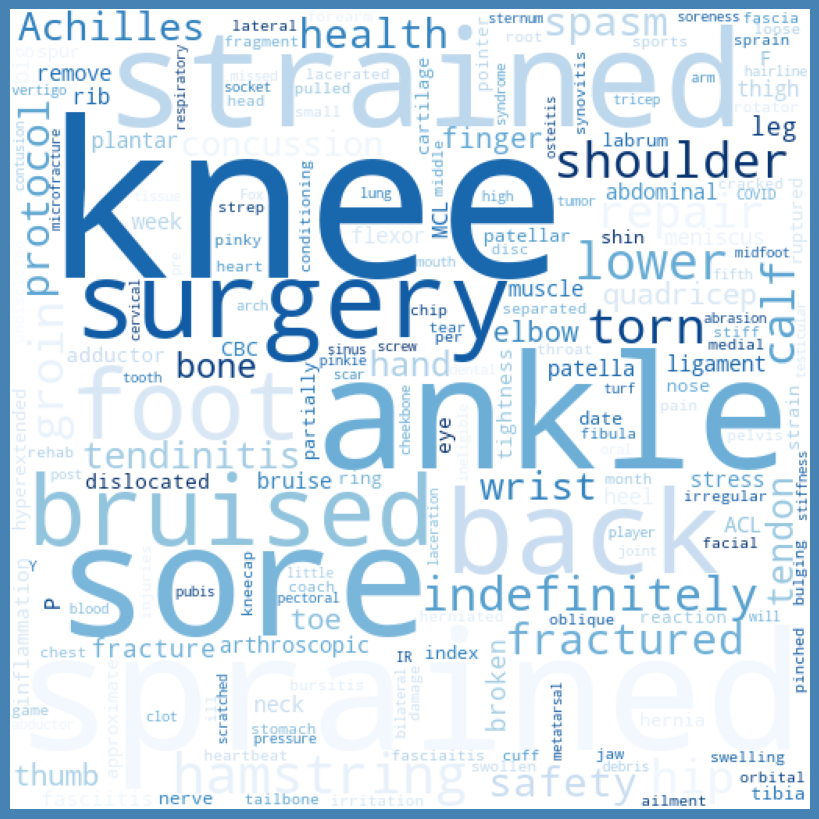

In [82]:
word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=stopwords, collocations = False, colormap = 'Blues').generate(words)
plt.figure(figsize=(10,8),facecolor = 'steelblue', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Pracujemy jedynie na finalnym zbiorze danych


1. Ilość kontuzji w podziale na część ciała, której kontuzja dotyczy.

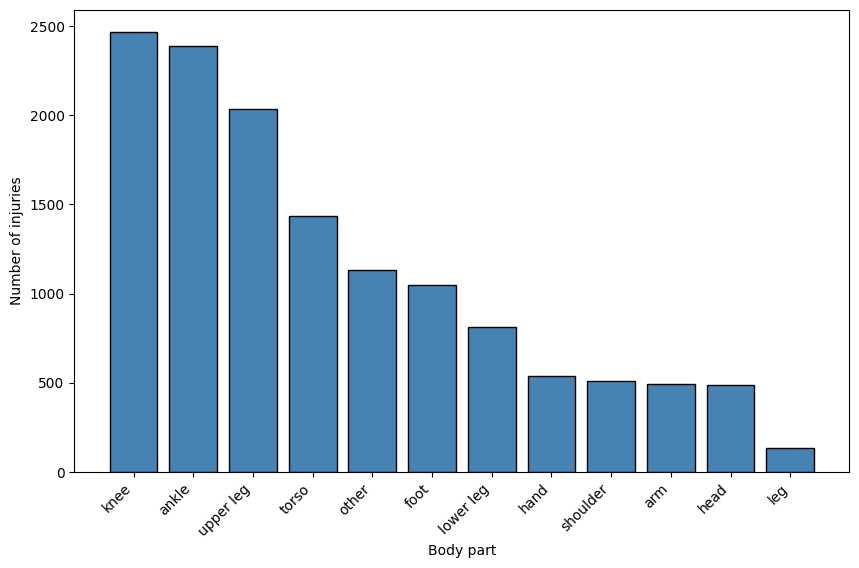

In [83]:
# Policzenie liczby wystąpień każdej kategorii
counts = final['Injury_Type'].value_counts()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='steelblue', edgecolor='black')

plt.xlabel('Body part')  # Nazwa osi X
plt.ylabel('Number of injuries')  # Nazwa osi Y

# Obrócenie etykiet na osi X dla czytelności
plt.xticks(rotation=45, ha='right')

plt.show()  # Wyświetlenie wykresu


# Na wykresie powyżej bardzo widoczne jest miejsce występowania największej ilości przeciążeń w koszykówce. Najczęściej odnoszonymi kontuzjami są kontuzje nóg, które mimo tego, że nie służą do "bezpośredniego" zdobywania punktów, przez grę opartą na skokach, zwodach i szybkich sprintach, doświadczają największej ilości przeciążeń. 

# kategoria upper leg często jest synonimem zerwanych ścięgien udowych (służących do sprintów) oraz mięśni ud.

1a. Wykres kołowy rodzajów kontuzji

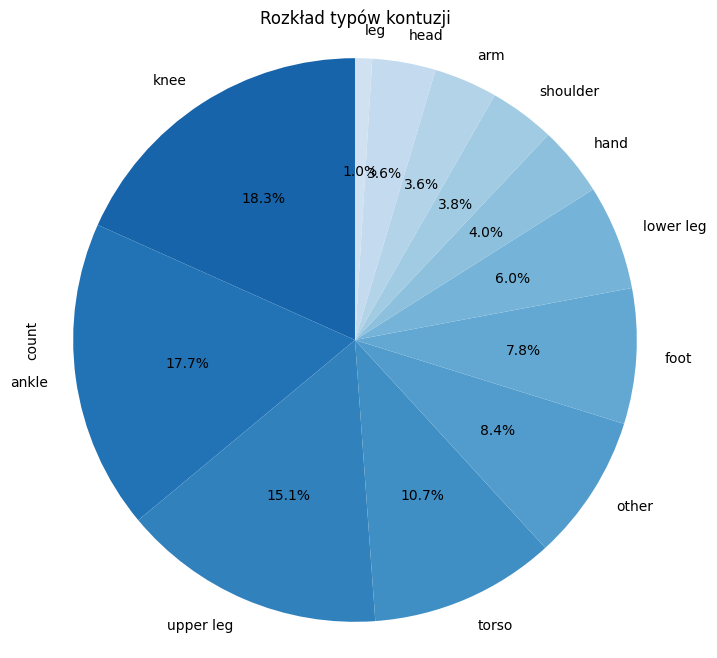

In [88]:
# Dane dotyczące kontuzji
type_counts = final['Injury_Type'].value_counts()

# Sortowanie wartości w kolejności malejącej
type_counts_sorted = type_counts.sort_values(ascending=False)

# Wybór 10 kolorów z palety 'Blues' w odwrotnej kolejności: od jaśniejszych do ciemniejszych
colors = plt.cm.Blues(np.linspace(0.8, 0.2, 12))  # Używamy cm.Blues i określamy zakres wartości od jaśniejszych do ciemniejszych

# Rysowanie wykresu kołowego
plt.figure(figsize=(8, 8))
type_counts_sorted.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Rozkład typów kontuzji')
plt.axis('equal')
plt.show()

2. Ilość kontuzji w podziale na rok.

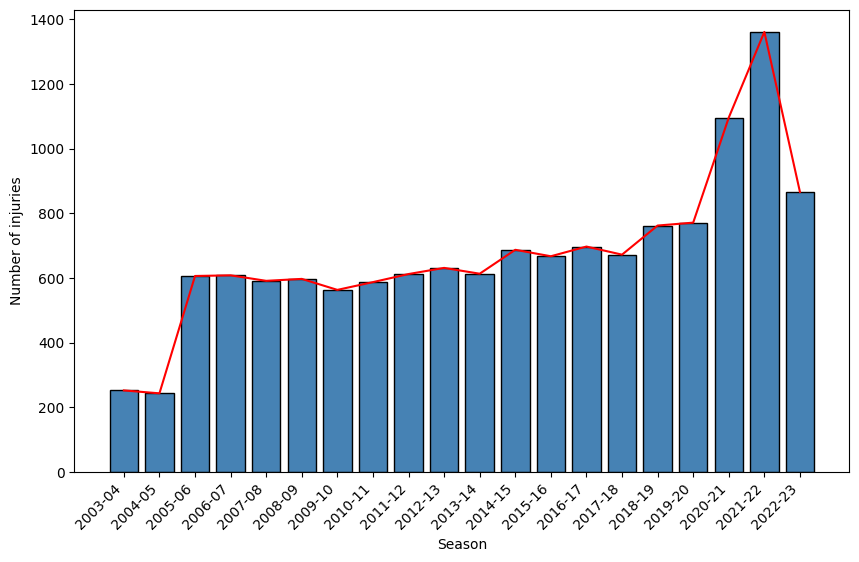

In [89]:
# Policzenie liczby wystąpień każdej kategorii
counts = final['SEASON_ID'].value_counts()

counts_sorted = counts.sort_index()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(counts_sorted.index, counts_sorted.values, color='steelblue', edgecolor='black')
plt.plot(counts_sorted.index, counts_sorted.values, color='red')
plt.xlabel('Season')  # Nazwa osi X
plt.ylabel('Number of injuries')  # Nazwa osi Y

# Obrócenie etykiet na osi X dla czytelności
plt.xticks(rotation=45, ha='right')

plt.show()  # Wyświetlenie wykresu

# Wyraźnie widoczny skok kontuzji w sezonach COVIDowych. Sezon 21-22 odbył się po najkrótszym "off-sezonie" w historii NBA. Był to okres 72 dni między zakończeniem poprzednich playoffów, a rozpoczęciem kolejnego sezonu regularnego, który także mógł wpłynąć negatywnie na ilość złamań przeciążeniowych. Po odrzuceniu outlierów (lata COVID oraz sezony 03-05) można uznać, że trend kontuzji jest stały lub lekko rosnący. Delikatny wzrost ilości kontuzji może być spowodowany zmianą charakteru gry, ze statycznej opartą o pozycję centrów pod koszem, w kierunku gry skrzydłami, opartą o dynamiczne podania, częste, szybkie zmiany pozycji, grę blokami oraz strzały z dystansu.

2a. Ilość danego typu kontuzji w podziale na rok

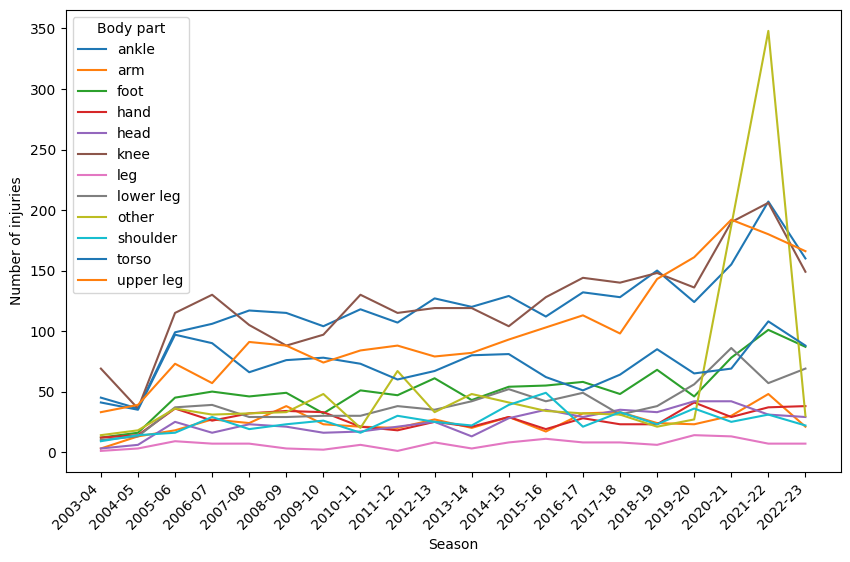

In [90]:
grouped = final.groupby(['SEASON_ID', 'Injury_Type']).size().unstack(fill_value=0)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))

for category in grouped.columns:
    plt.plot(grouped.index, grouped[category], label=category)

plt.xlabel('Season')
plt.ylabel('Number of injuries')
plt.legend(title='Body part')
# Obrócenie etykiet na osi X dla czytelności
plt.xticks(rotation=45, ha='right')

plt.show()

In [92]:
# Kategoria "other" zazwyczaj oznaczające absencje z powodów niezwiązanych ze sportem (tj. problemy psychiczne, rodzinne, prawne) w ciągu 2 sezonów osiągnęła bardzo wysokie wartości, a jest to pokłosie pandemii COVID 19. 
# Poza nią, delikatny trend rosnący ilości kontuzji można też zauważyć wzrost ilości kontuzji rąk. Może to być związane właśnie ze zmianą charakteru gry, gdzie rzuty za 3 wymagają pełnej sprawności rąk oraz barków.

2b. Ilość kontuzji w podziale na miesiąc.

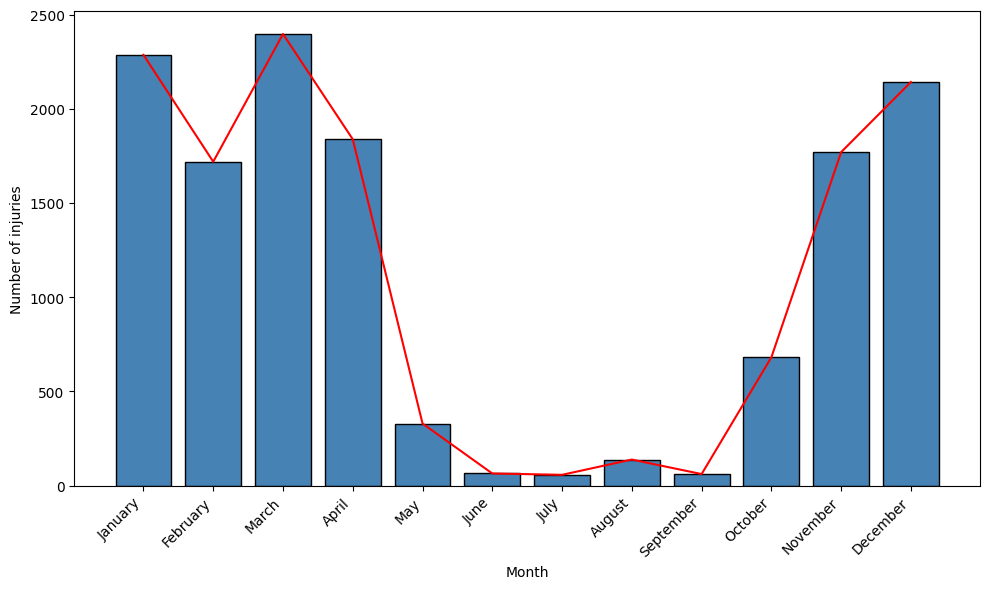

In [87]:
counts = final['Date'].dt.month.value_counts().sort_index()

# Stwórz wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='steelblue', edgecolor='black')
plt.plot(counts.index, counts.values, color='red')  # opcjonalnie, dodaj punkty na wykresie

# Etykiety i tytuł wykresu
plt.xlabel('Month')
plt.ylabel('Number of injuries')


# Obróć etykiety na osi X dla czytelności
plt.xticks(counts.index, ['January', 'February', 'March', 'April', 'May', 'June',
                          'July', 'August', 'September', 'October', 'November', 'December'],
           rotation=45, ha='right')

plt.tight_layout()  # opcjonalnie, poprawia rozmieszczenie elementów na wykresie
plt.show()

In [ ]:
# Nie widoczny jest trend większej ilości kontuzji w ciągu trwania sezonu regularnego. Tj. raczej nie występuje korelacja pomiędzy długością sezonu, a ilością kontuzji.

3. Ilość kontuzji per zawodnik.

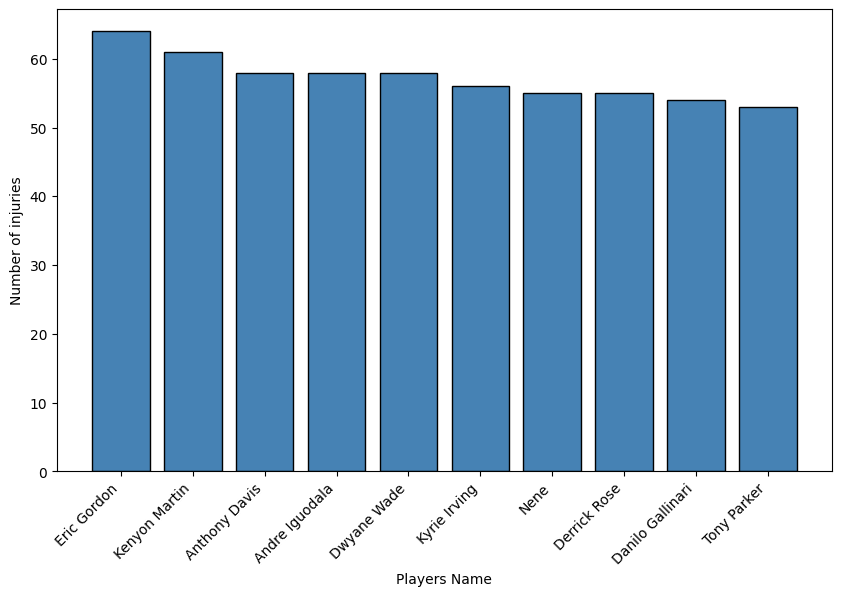

In [93]:
# Policzenie liczby wystąpień każdej kategorii
counts = final['Name'].value_counts()

counts = counts.head(10)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='steelblue', edgecolor='black')

plt.xlabel('Player''s Name')  # Nazwa osi X
plt.ylabel('Number of injuries')  # Nazwa osi Y

# Obrócenie etykiet na osi X dla czytelności
plt.xticks(rotation=45, ha='right')

plt.show()  # Wyświetlenie wykresu

4. Ilość kontuzji w relacji z wiekiem zawodnika, którego dotyczy kontuzja.

C:\Users\jmroczek\AppData\Local\Temp\ipykernel_36876\1228860532.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


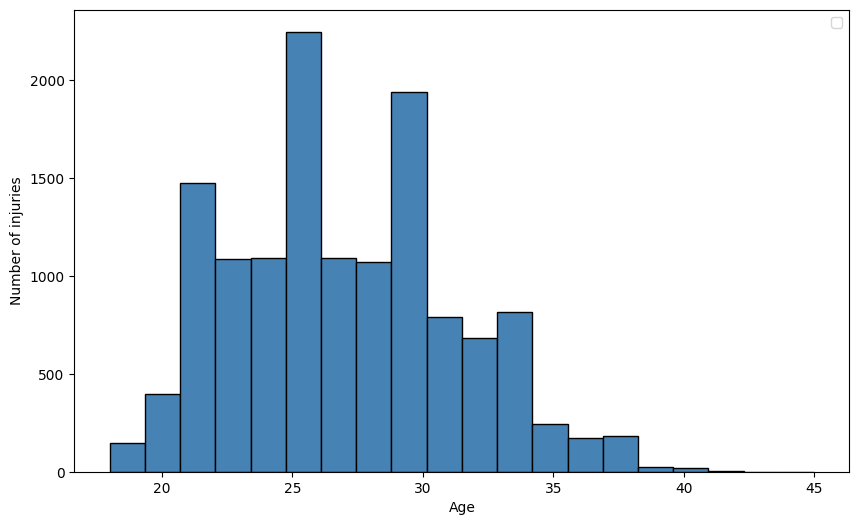

In [94]:
# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(final['Age'], color='steelblue', bins=20, edgecolor='black') # 'bins' definiuje liczbę przedziałów w histogramie, edgecolor dodaje czarne ramki

# Dodanie tytułu, opisów osi oraz legendy
plt.xlabel('Age')
plt.ylabel('Number of injuries')
plt.legend()

# Pokazanie histogramu
plt.show()

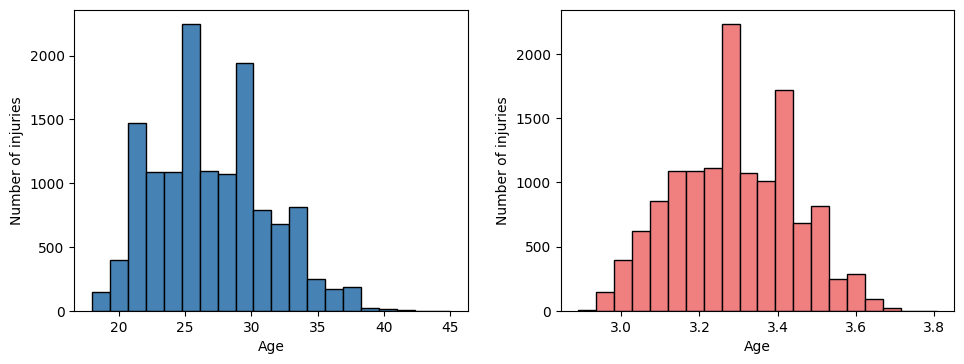

In [95]:
plt.figure(figsize=(10, 4))

# Histogram dla całego zakresu wieku
plt.subplot(1, 2, 1)
plt.hist(final['Age'], color='steelblue', bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of injuries')

# Histogram dla przedziału wiekowego od 18 do 40 lat
plt.subplot(1, 2, 2)
plt.hist(np.log(final['Age']), color='lightcoral', bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of injuries')

plt.tight_layout(pad=2.0)
plt.show()

Text(0, 0.5, 'Number of injuries')

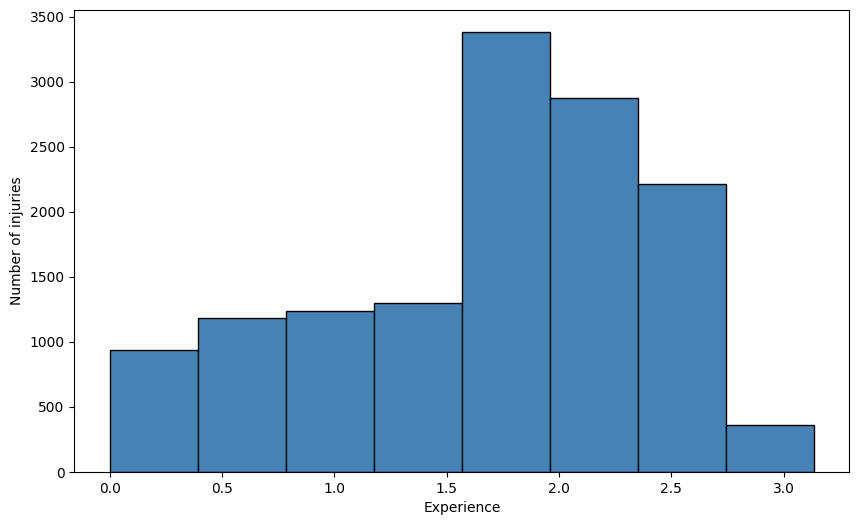

In [96]:
plt.figure(figsize=(10, 6))

# Histogram dla całego zakresu wieku
plt.hist(np.log(final['Experience']+1), color='steelblue', bins = 8, edgecolor='black')
plt.xlabel('Experience')
plt.ylabel('Number of injuries')

5. Histogram wagi zawodnika, w przypadku wystąpienia kontuzji.

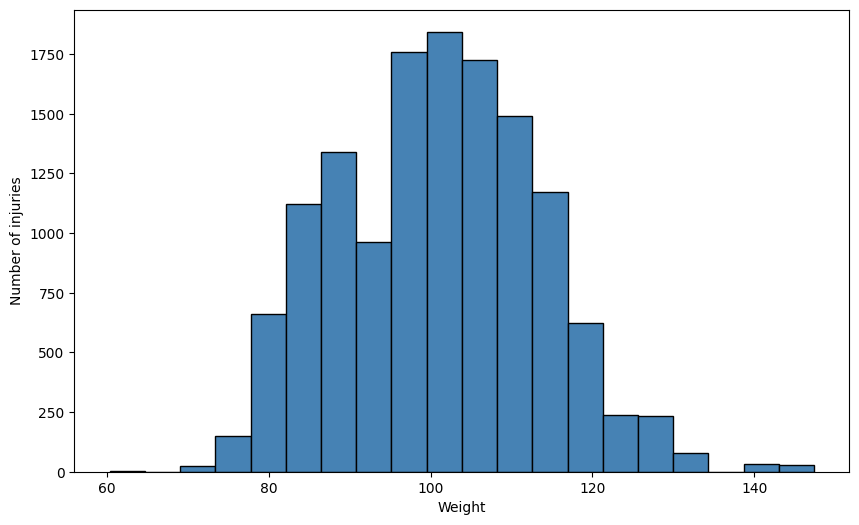

In [97]:
# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(final['WEIGHT'], color='steelblue', bins=20, edgecolor='black') # 'bins' definiuje liczbę przedziałów w histogramie, edgecolor dodaje czarne ramki

# Dodanie tytułu, opisów osi oraz legendy
plt.xlabel('Weight')
plt.ylabel('Number of injuries')

# Pokazanie histogramu
plt.show()

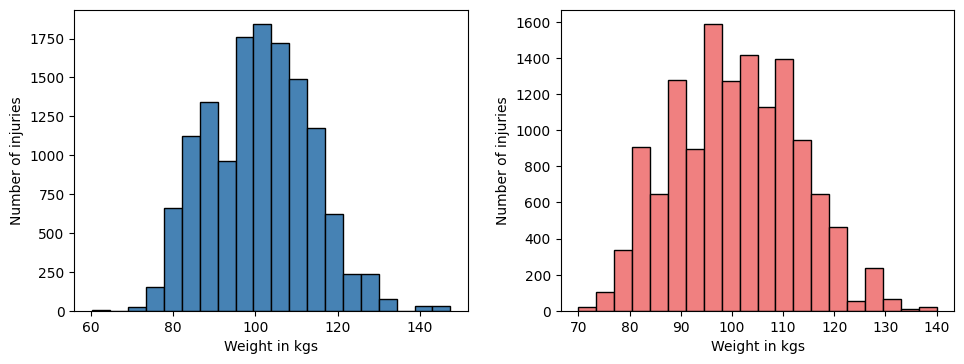

In [99]:
plt.figure(figsize=(10, 4))

# Histogram dla całego zakresu zmiennej 'height'
plt.subplot(1, 2, 1)
plt.hist(final['WEIGHT'], color='steelblue', bins=20, edgecolor='black')
plt.xlabel('Weight in kgs')
plt.ylabel('Number of injuries')

# Histogram dla przedziału wartości od 170 do 220
plt.subplot(1, 2, 2)
plt.hist(final['WEIGHT'], color='lightcoral', bins=20, edgecolor='black', range=(70, 140))
plt.xlabel('Weight in kgs')
plt.ylabel('Number of injuries')

plt.tight_layout(pad=2.0)
plt.show()

6. Histogram wagi zawodnika, w przypadku wystąpienia kontuzji.

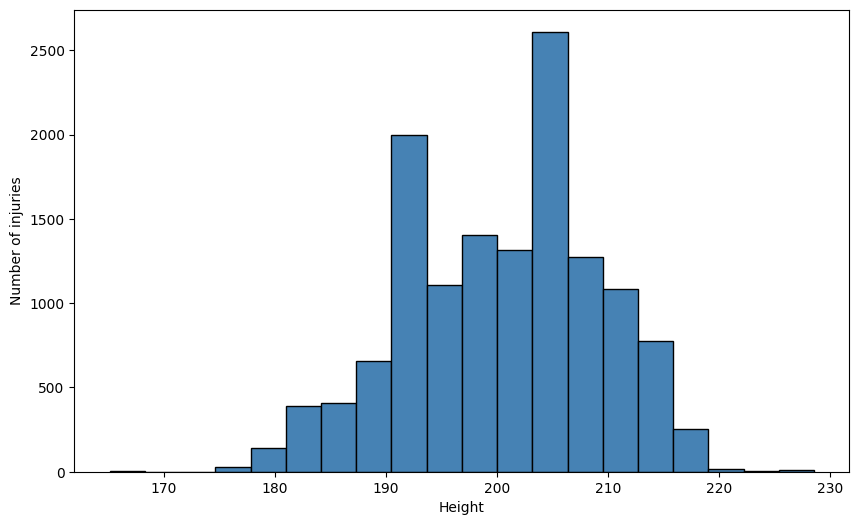

In [100]:
# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(final['HEIGHT'], color='steelblue', bins=20, edgecolor='black') # 'bins' definiuje liczbę przedziałów w histogramie, edgecolor dodaje czarne ramki

# Dodanie tytułu, opisów osi oraz legendy
plt.xlabel('Height')
plt.ylabel('Number of injuries')

# Pokazanie histogramu
plt.show()

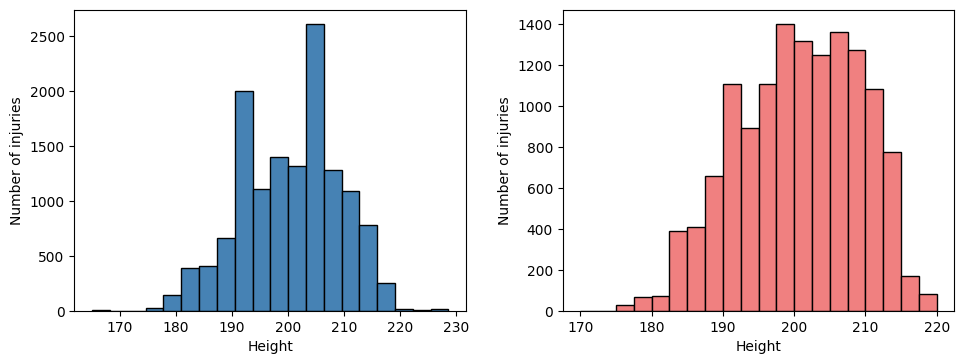

In [101]:
plt.figure(figsize=(10, 4))

# Histogram dla całego zakresu zmiennej 'height'
plt.subplot(1, 2, 1)
plt.hist(final['HEIGHT'], color='steelblue', bins=20, edgecolor='black')
plt.xlabel('Height')
plt.ylabel('Number of injuries')

# Histogram dla przedziału wartości od 170 do 220
plt.subplot(1, 2, 2)
plt.hist(final['HEIGHT'], color='lightcoral', bins=20, edgecolor='black', range=(170, 220))
plt.xlabel('Height')
plt.ylabel('Number of injuries')

plt.tight_layout(pad=2.0)
plt.show()

Times Missed - do weryfikacji co tam sie dzieje, imo jest coś nie tak.

In [102]:
final['Time_Missed'].astype(float).describe()

count    13482.000000
mean        51.392375
std        106.400445
min          2.000000
25%          5.000000
50%          9.000000
75%         27.000000
max       1770.000000
Name: Time_Missed, dtype: float64

In [103]:
# Przekonwertuj kolumnę 'Time_Missed' na typ float
final['Time_Missed'] = final['Time_Missed'].astype(float)


C:\Users\jmroczek\AppData\Local\Temp\ipykernel_36876\4173359598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Time_Missed'] = final['Time_Missed'].astype(float)


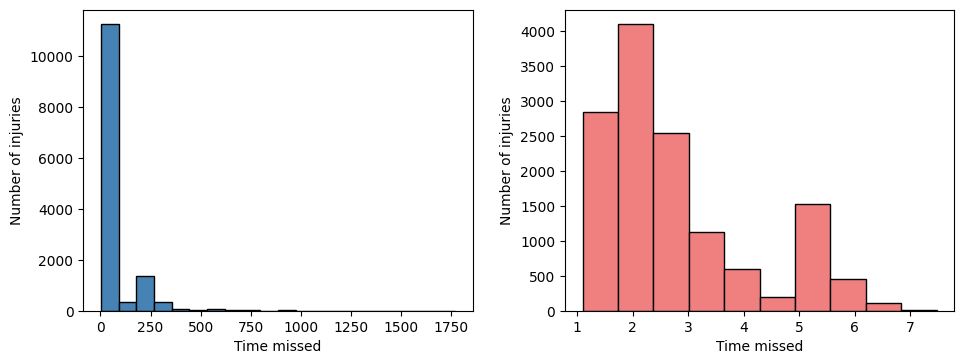

In [104]:
plt.figure(figsize=(10, 4))

# Tworzenie histogramu
plt.subplot(1, 2, 1)
plt.hist(final['Time_Missed'], color='steelblue', bins=20, edgecolor='black') # 'bins' definiuje liczbę przedziałów w histogramie, edgecolor dodaje czarne ramki
# Dodanie tytułu, opisów osi oraz legendy
plt.xlabel('Time missed')
plt.ylabel('Number of injuries')


# Tworzenie histogramu
plt.subplot(1, 2, 2)
plt.hist(np.log(final['Time_Missed'] + 1), color='lightcoral', edgecolor='black') # 'bins' definiuje liczbę przedziałów w histogramie, edgecolor dodaje czarne ramki

plt.xlabel('Time missed')
plt.ylabel('Number of injuries')


plt.tight_layout(pad=2.0)
plt.show()


6. Ilość kontuzji w podziale na pozycję zawodnika na boisku

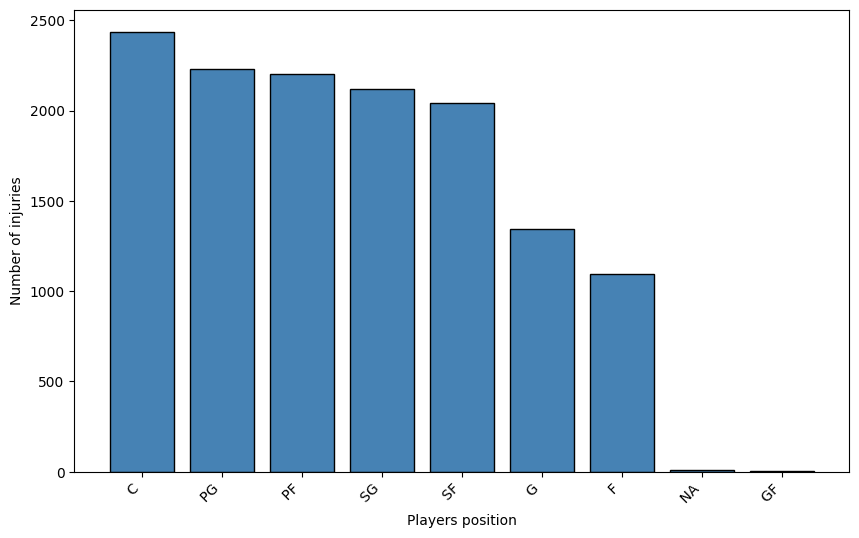

In [105]:
# Policzenie liczby wystąpień każdej kategorii
counts = final['Position'].value_counts()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='steelblue', edgecolor='black')

plt.xlabel('Player''s position')  # Nazwa osi X
plt.ylabel('Number of injuries')  # Nazwa osi Y

# Obrócenie etykiet na osi X dla czytelności
plt.xticks(rotation=45, ha='right')

plt.show()  # Wyświetlenie wykresu

7. Ilość kontuzji z kategorii "Serious Injury". - Do weryfikacji, co się kryje za tą zmienną

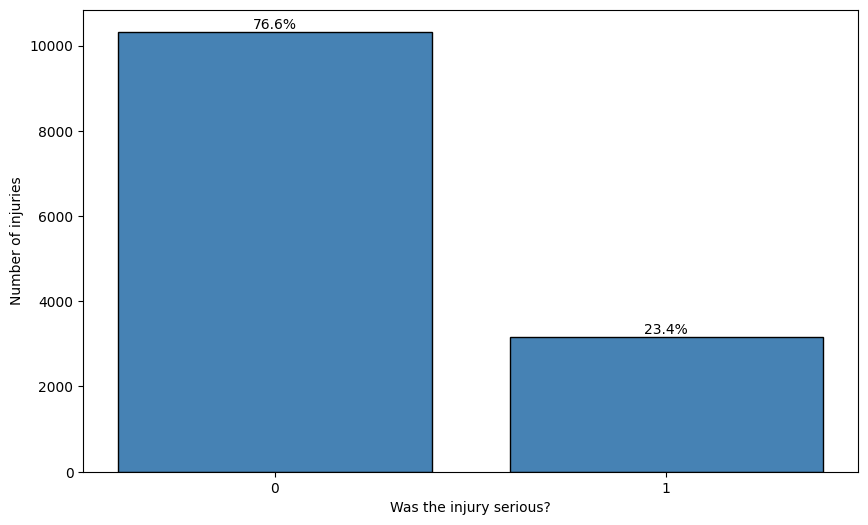

In [106]:
# Przykładowe dane (zmień na swoje dane rzeczywiste)
counts = final['Serious_Injury'].value_counts()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color='steelblue', edgecolor='black')
# Dodanie etykiet z procentami na słupkach
total = counts.sum()
for bar, value in zip(bars, counts.values):
    percentage = value / total * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{percentage:.1f}%', 
             ha='center', va='bottom')

# Ustawienie etykiet osi X na wartości 0 i 1
plt.xticks([0, 1], ['0', '1'])

plt.xlabel('Was the injury serious?')  # Nazwa osi X
plt.ylabel('Number of injuries')  # Nazwa osi Y


plt.show()  # Wyświetlenie wykresu

7a. Serious Injury w podziale na typ kontuzji

8 Zmienna którą predykujemy: MEAN_10_AFTER_INJURY

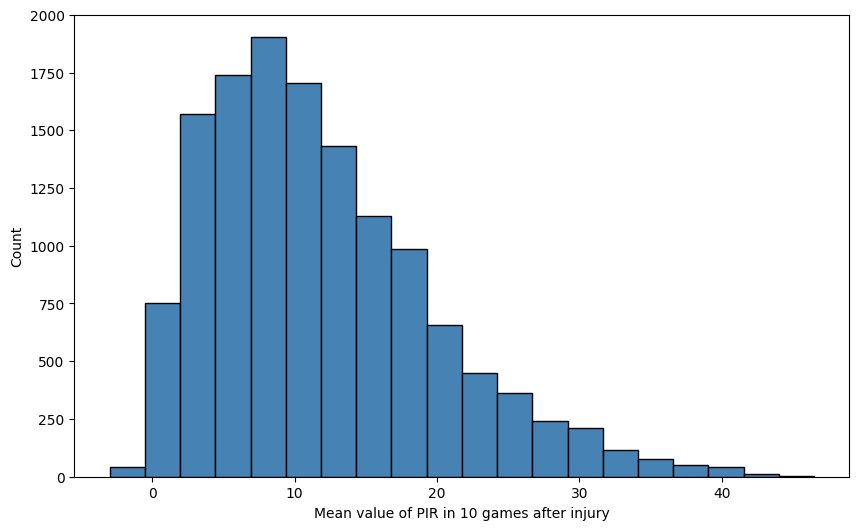

In [107]:
# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(final['MEAN_PIR_AFTER_INJURY'], color='steelblue', bins=20, edgecolor='black') # 'bins' definiuje liczbę przedziałów w histogramie, edgecolor dodaje czarne ramki

# Dodanie tytułu, opisów osi oraz legendy
plt.xlabel('Mean value of PIR in 10 games after injury')
plt.ylabel('Count')

# Pokazanie histogramu
plt.show()

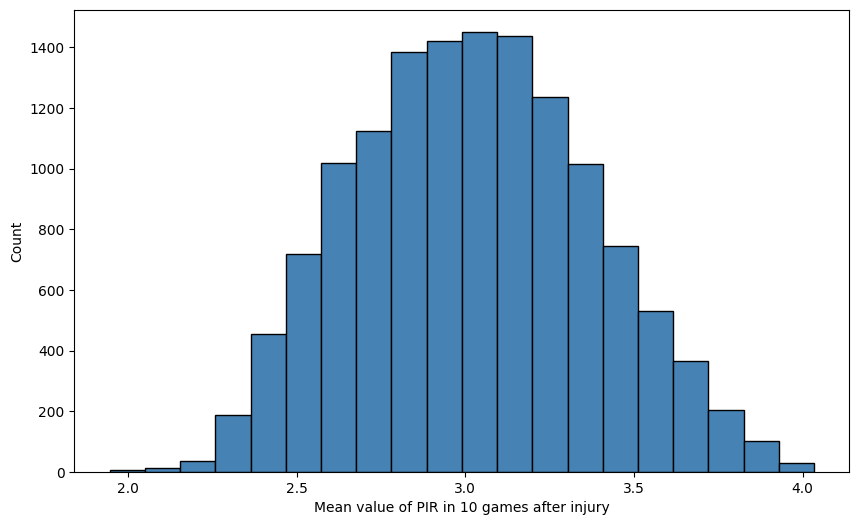

In [108]:
# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(np.log(final['MEAN_PIR_AFTER_INJURY']+10), color='steelblue', bins=20, edgecolor='black') # 'bins' definiuje liczbę przedziałów w histogramie, edgecolor dodaje czarne ramki

# Dodanie tytułu, opisów osi oraz legendy
plt.xlabel('Mean value of PIR in 10 games after injury')
plt.ylabel('Count')

# Pokazanie histogramu
plt.show()

Statystyki podstawowe zmiennej MEAN_PIR_AFTER_INJURY, MEAN_PIR_BEFORE_INJURY i róznic miedzy nimi

In [105]:
final['MEAN_PIR_AFTER_INJURY'].describe()

count    13482.000000
mean        11.863289
std          7.935377
min         -3.000000
25%          5.900000
50%         10.300000
75%         16.300000
max         46.500000
Name: MEAN_PIR_AFTER_INJURY, dtype: float64

In [106]:
final['MEAN_PIR_BEFORE_INJURY'].describe()

count    13482.000000
mean        12.680931
std          7.985633
min         -4.000000
25%          6.700000
50%         11.400000
75%         17.300000
max         49.300000
Name: MEAN_PIR_BEFORE_INJURY, dtype: float64

In [113]:
final.head()

,SEASON_ID,Name,HEIGHT,WEIGHT,Date,Injury_Type,Age,Experience,Salary,Time_Missed,Serious_Injury,Position,MEAN_PIR_BEFORE_INJURY,MEAN_PIR_AFTER_INJURY
177,2009-10,AJ Price,187.96,88.45044,2010-02-09,head,23.0,0.0,0.457588,16.0,0,PG,7.2,6.5
202,2009-10,AJ Price,187.96,88.45044,2010-05-24,knee,23.0,0.0,0.457588,216.0,1,PG,8.9,4.9
265,2011-12,AJ Price,187.96,88.45044,2012-01-24,other,25.0,2.0,0.854389,15.0,0,PG,2.9,4.9
324,2012-13,AJ Price,187.96,88.45044,2012-12-11,hand,26.0,3.0,0.854389,30.0,0,PG,9.0,10.1
354,2012-13,AJ Price,187.96,88.45044,2013-03-13,upper leg,26.0,3.0,0.854389,17.0,0,PG,5.6,7.6


Współczynnik korelacji Pearsona: -0.0472
P-wartość: 0.0000


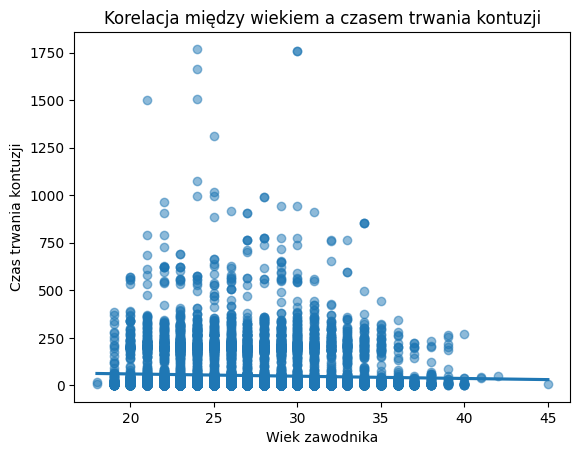

In [118]:
age = final['Age']
time_missed = final['Time_Missed']

# Obliczenie współczynnika korelacji Pearsona
correlation, p_value = pearsonr(age, time_missed)
print(f'Współczynnik korelacji Pearsona: {correlation:.4f}')
print(f'P-wartość: {p_value:.4f}')

# Wizualizacja zależności
sns.regplot(x=age, y=time_missed, data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Wiek zawodnika')
plt.ylabel('Czas trwania kontuzji')
plt.title('Korelacja między wiekiem a czasem trwania kontuzji')
plt.show()

In [120]:
# Współczynnik korelacji pomiędzy wiekiem, a długością kontuzji wskazuje na to, że istnieje bardzo słaba negatywna korelacja między zmiennymi, 
# ale jej bliskość do 0 może sugerować, że praktywnie nie powinna być brana pod uwagę. P-value oznacza, że wynik jest istotny statystycznie i istnieje bardzo małe prawdopodobieństwo, że korelacja pojawiła się przypadkowo.